# First Models

I need some functions for KNN to:

- fast load data
- build distance matrices
- cross-validate alphas


- **Categorical features**: conc1_type, exposure_type, control_type, media_type, application_freq_unit, class, tax_order, family, genus, species

- **Non Categorical features**: obs_duration_mean, conc1_mean, atom_number, alone_atom_number, bonds_number, doubleBond, tripleBond, ring_number, Mol, MorganDensity, LogP, oh_count

In [1]:
from helper_knn import *

X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)

In [2]:
print(X_train.shape)
print(X_test.shape)

(17986, 22)
(8860, 22)


In [4]:
categorical = ['conc1_type', 'exposure_type', 'control_type', 'media_type', 'application_freq_unit',
                    'class', 'tax_order', 'family', 'genus', 'species']

non_categorical = ['obs_duration_mean', 'atom_number', 'alone_atom_number', 'bonds_number', 'doubleBond',
                   'tripleBond', 'ring_number', 'Mol', 'MorganDensity', 'LogP', 'oh_count']

In [11]:
from time import ctime
print(ctime())
dist_matr = hamming_matrix(X_try, categorical)
print(ctime())

Fri Sep  4 19:18:18 2020
Fri Sep  4 19:19:05 2020


In [18]:
print(ctime())
dist_matr += euclidean_matrix(X_try, non_categorical)
print(ctime())

Fri Sep  4 19:24:00 2020
Fri Sep  4 19:57:14 2020


In [19]:
dist_matr_train = dist_matr[:len_X_train,:len_X_train]
dist_matr_test = dist_matr[len_X_train:,:len_X_train]

In [21]:
# Matrice euclidea + hamming entrambi peso 1
neigh = KNeighborsClassifier(metric = 'precomputed', n_neighbors = 1, leaf_size = 70)
neigh.fit(dist_matr_train, y_train.ravel())
y_pred = neigh.predict(dist_matr_test)
print('Model: {}, \n Accuracy: {},\n RMSE: {}'.format(neigh,
                                                      accuracy_score(y_test, y_pred),
                                                      sqrt(mean_squared_error(y_test, y_pred))))

Model: KNeighborsClassifier(algorithm='auto', leaf_size=70, metric='precomputed',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'), 
 Accuracy: 0.841647855530474,
 RMSE: 0.3979348495288217


In [47]:
# Dati normali con ordinal encoding
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train.drop(columns = ['pubchem2d']), y_train.ravel())
y_pred = neigh.predict(X_test.drop(columns = ['pubchem2d']))
print('Model: {}, \n Accuracy: {},\n RMSE: {}'.format(neigh,
                                                      accuracy_score(y_test, y_pred),
                                                      sqrt(mean_squared_error(y_test, y_pred))))

Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 
 Accuracy: 0.7252821670428894,
 RMSE: 0.5241353193185044


# KNN tables (BINARY and MULTICLASS)

## PUBCHEM2D

In [1]:
from helper_knn import *
from time import ctime
X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)

print(ctime())
dist_matr = pubchem2d_matrix(X_try)
print(ctime())

X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

Sat Sep  5 11:26:11 2020
Sat Sep  5 11:37:57 2020


In [34]:
X_try, X_train, X_test, y_train_bin, y_test_bin, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)
X_try, X_train, X_test, y_train_mul, y_test_mul, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'multiclass', seed = 42)

In [56]:
tab_pub_bin = create_table(X_train_new, X_test_new, y_train_bin, y_test_bin, encoding = 'binary')

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [58]:
tab_pub_bin.to_csv('output/table_knn_pubchem_binary.csv')

In [59]:
tab_pub_mul = create_table(X_train_new, X_test_new, y_train_mul, y_test_mul, encoding = 'multiclass')

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [61]:
tab_pub_mul.to_csv('output/table_knn_pubchem_multiclass.csv')

### DISPLAY

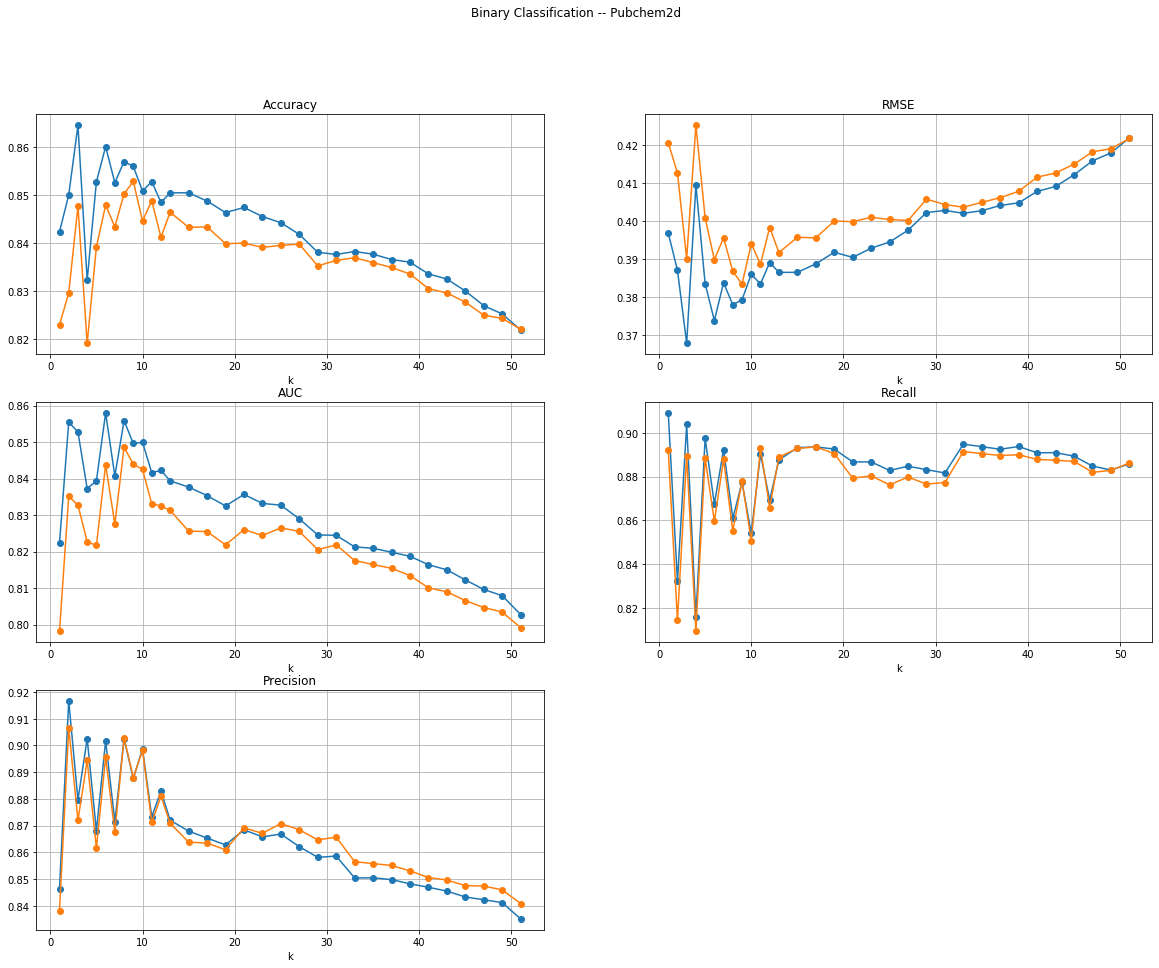

In [8]:
from helper_knn import *
tab_pub_bin = pd.read_csv('output/table_knn_pubchem_binary.csv').drop(columns = 'Unnamed: 0')
display_table(tab_pub_bin, 'Binary Classification -- Pubchem2d', encoding = 'binary')

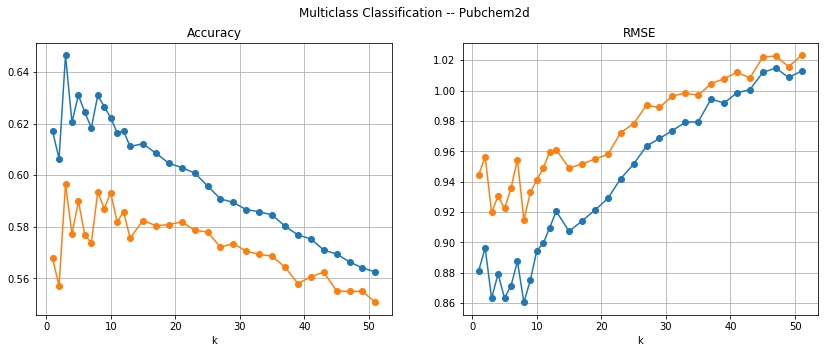

In [10]:
from helper_knn import *
tab_pub_mul = pd.read_csv('output/table_knn_pubchem_multiclass.csv').drop(columns = 'Unnamed: 0')

display_table(tab_pub_mul, 'Multiclass Classification -- Pubchem2d', encoding = 'multiclass')

## TANIMOTO

In [1]:
from helper_knn import *
from time import ctime

X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)

In [3]:
print(ctime())
dist_matr = tanimoto_matrix(X_try)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

Sat Sep  5 12:57:49 2020
Sat Sep  5 13:07:13 2020


In [4]:
X_try, X_train, X_test, y_train_bin, y_test_bin, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)
X_try, X_train, X_test, y_train_mul, y_test_mul, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'multiclass', seed = 42)

In [5]:
tab_tan_bin = create_table(X_train_new, X_test_new, y_train_bin, y_test_bin, encoding = 'binary')

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [7]:
tab_tan_bin.to_csv('output/table_knn_tanimoto_binary.csv')

In [5]:
tab_tan_mul = create_table(X_train_new, X_test_new, y_train_mul, y_test_mul, encoding = 'multiclass')

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [7]:
tab_tan_mul.to_csv('output/table_knn_tanimoto_multiclass.csv')

### DISPLAY

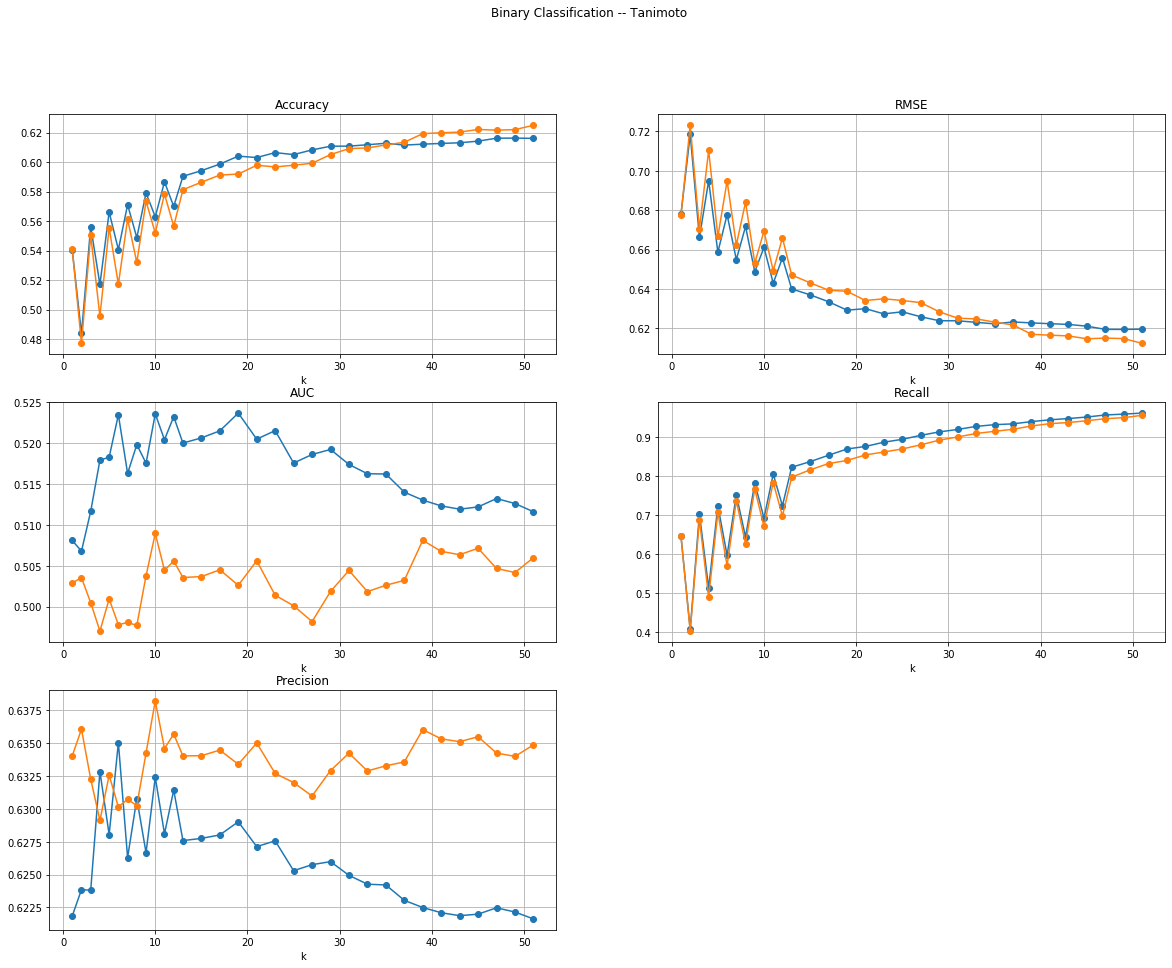

In [11]:
from helper_knn import *
tab_tan_bin = pd.read_csv('output/table_knn_tanimoto_binary.csv').drop(columns = 'Unnamed: 0')

display_table(tab_tan_bin, 'Binary Classification -- Tanimoto', encoding = 'binary')

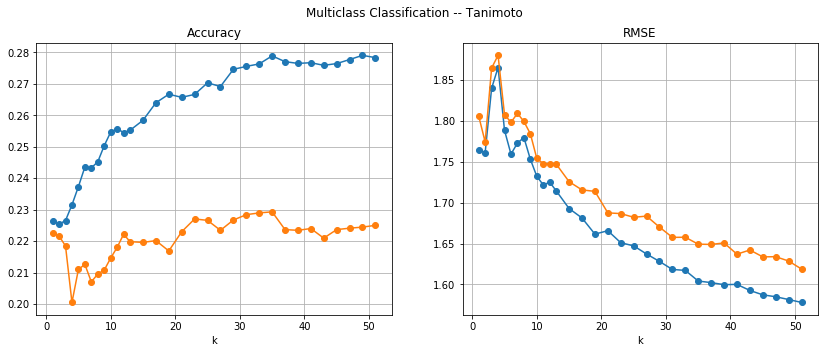

In [12]:
from helper_knn import *
tab_tan_mul = pd.read_csv('output/table_knn_tanimoto_multiclass.csv').drop(columns = 'Unnamed: 0')

display_table(tab_tan_mul, 'Multiclass Classification -- Tanimoto', encoding = 'multiclass')

## Previous work (binary)

In [1]:
from helper_knn import *

X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)

In [2]:
categorical = ['conc1_type', 'exposure_type', 'control_type', 'media_type', 'application_freq_unit',
                    'class', 'tax_order', 'family', 'genus', 'species']

non_categorical = ['obs_duration_mean', 'atom_number', 'alone_atom_number', 'bonds_number', 'doubleBond',
                   'tripleBond', 'ring_number', 'Mol', 'MorganDensity', 'LogP', 'oh_count']

In [5]:
k_try = [1,3,5,7,11,13,15,17,19,23,31,41,51]

c = [0,0]
ham = np.logspace(-3, 0, 20) 
for i in k_try:
    best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [i])
    print('\n \n Con K = {}, a_ham = {}, best_leaf = {} \n \n'.format(i,best_alpha, best_leaf))

Sat Sep  5 16:19:59 2020
START...
Computing Euclidean ...

 Sat Sep  5 16:20:06 2020
Adding Hamming 1 (Categorical)... alpha = 0.001
Sat Sep  5 16:20:18 2020
Start CV...
New best params found! alpha:0.001, k:1, leaf:10,
                                                        acc:  0.8502169756373161, st.error:  0.0035580953231469743,
                                                        rmse: 0.386908070820739, st.error:  0.004614355221961838
New best params found! alpha:0.001, k:1, leaf:70,
                                                        acc:  0.850772979088404, st.error:  0.001792802213800983,
                                                        rmse: 0.3862708329570096, st.error:  0.0023379755288458226
New best params found! alpha:0.001, k:1, leaf:80,
                                                        acc:  0.8512179796547767, st.error:  0.0030003286929793592,
                                                        rmse: 0.38564412381215984, st.error:  0.0038932670

Sat Sep  5 19:46:39 2020
Start CV...

 Sat Sep  5 19:50:53 2020
Adding Hamming 1 (Categorical)... alpha = 1.0
Sat Sep  5 19:52:51 2020
Start CV...

 
 Con K = 3, a_ham = 0.002976351441631319, best_leaf = 100 
 

Sat Sep  5 19:57:07 2020
START...
Computing Euclidean ...

 Sat Sep  5 19:57:15 2020
Adding Hamming 1 (Categorical)... alpha = 0.001
Sat Sep  5 19:57:27 2020
Start CV...
New best params found! alpha:0.001, k:5, leaf:10,
                                                        acc:  0.8458804299735295, st.error:  0.0036655979399562257,
                                                        rmse: 0.39246623023080424, st.error:  0.004738885810287778

 Sat Sep  5 20:02:03 2020
Adding Hamming 1 (Categorical)... alpha = 0.0014384498882876629
Sat Sep  5 20:04:35 2020
Start CV...
New best params found! alpha:0.0014384498882876629, k:5, leaf:20,
                                                        acc:  0.8473258473222774, st.error:  0.0025584228056136113,
                           

Sun Sep  6 00:33:21 2020
Start CV...

 Sun Sep  6 00:37:10 2020
Adding Hamming 1 (Categorical)... alpha = 0.00206913808111479
Sun Sep  6 00:39:05 2020
Start CV...
New best params found! alpha:0.00206913808111479, k:11, leaf:10,
                                                        acc:  0.8265320074801388, st.error:  0.0024819005896935787,
                                                        rmse: 0.4164524203604131, st.error:  0.002973806307374103
New best params found! alpha:0.00206913808111479, k:11, leaf:30,
                                                        acc:  0.8279211120748979, st.error:  0.0030949048385624585,
                                                        rmse: 0.4147558995129768, st.error:  0.0037560532572013306

 Sun Sep  6 00:43:01 2020
Adding Hamming 1 (Categorical)... alpha = 0.002976351441631319
Sun Sep  6 00:44:34 2020
Start CV...

 Sun Sep  6 00:48:25 2020
Adding Hamming 1 (Categorical)... alpha = 0.004281332398719396
Sun Sep  6 00:49:36 2020
Star


 Sun Sep  6 04:58:52 2020
Adding Hamming 1 (Categorical)... alpha = 0.012742749857031334
Sun Sep  6 04:59:44 2020
Start CV...

 Sun Sep  6 05:03:34 2020
Adding Hamming 1 (Categorical)... alpha = 0.018329807108324356
Sun Sep  6 05:04:39 2020
Start CV...

 Sun Sep  6 05:08:30 2020
Adding Hamming 1 (Categorical)... alpha = 0.026366508987303583
Sun Sep  6 05:09:31 2020
Start CV...

 Sun Sep  6 05:13:22 2020
Adding Hamming 1 (Categorical)... alpha = 0.0379269019073225
Sun Sep  6 05:14:45 2020
Start CV...

 Sun Sep  6 05:18:38 2020
Adding Hamming 1 (Categorical)... alpha = 0.05455594781168517
Sun Sep  6 05:20:48 2020
Start CV...

 Sun Sep  6 05:24:42 2020
Adding Hamming 1 (Categorical)... alpha = 0.07847599703514611
Sun Sep  6 05:26:20 2020
Start CV...

 Sun Sep  6 05:30:12 2020
Adding Hamming 1 (Categorical)... alpha = 0.11288378916846883
Sun Sep  6 05:31:12 2020
Start CV...

 Sun Sep  6 05:35:03 2020
Adding Hamming 1 (Categorical)... alpha = 0.1623776739188721
Sun Sep  6 05:36:56 2020
Sta

Sun Sep  6 09:14:26 2020
Start CV...

 Sun Sep  6 09:18:19 2020
Adding Hamming 1 (Categorical)... alpha = 0.11288378916846883
Sun Sep  6 09:20:00 2020
Start CV...

 Sun Sep  6 09:23:56 2020
Adding Hamming 1 (Categorical)... alpha = 0.1623776739188721
Sun Sep  6 09:25:01 2020
Start CV...

 Sun Sep  6 09:28:54 2020
Adding Hamming 1 (Categorical)... alpha = 0.23357214690901212
Sun Sep  6 09:30:02 2020
Start CV...

 Sun Sep  6 09:33:53 2020
Adding Hamming 1 (Categorical)... alpha = 0.3359818286283781
Sun Sep  6 09:35:14 2020
Start CV...

 Sun Sep  6 09:39:07 2020
Adding Hamming 1 (Categorical)... alpha = 0.4832930238571752
Sun Sep  6 09:43:17 2020
Start CV...

 Sun Sep  6 09:47:17 2020
Adding Hamming 1 (Categorical)... alpha = 0.6951927961775606
Sun Sep  6 09:55:48 2020
Start CV...

 Sun Sep  6 10:00:02 2020
Adding Hamming 1 (Categorical)... alpha = 1.0
Sun Sep  6 10:04:49 2020
Start CV...

 
 Con K = 19, a_ham = 0.012742749857031334, best_leaf = 70 
 

Sun Sep  6 10:08:47 2020
START...
Co


 Sun Sep  6 14:01:43 2020
Adding Hamming 1 (Categorical)... alpha = 0.0014384498882876629
Sun Sep  6 14:02:38 2020
Start CV...

 Sun Sep  6 14:06:29 2020
Adding Hamming 1 (Categorical)... alpha = 0.00206913808111479
Sun Sep  6 14:07:49 2020
Start CV...

 Sun Sep  6 14:11:46 2020
Adding Hamming 1 (Categorical)... alpha = 0.002976351441631319
Sun Sep  6 14:14:15 2020
Start CV...

 Sun Sep  6 14:18:08 2020
Adding Hamming 1 (Categorical)... alpha = 0.004281332398719396
Sun Sep  6 14:19:42 2020
Start CV...

 Sun Sep  6 14:23:39 2020
Adding Hamming 1 (Categorical)... alpha = 0.006158482110660267
Sun Sep  6 14:27:39 2020
Start CV...

 Sun Sep  6 14:31:33 2020
Adding Hamming 1 (Categorical)... alpha = 0.008858667904100823
Sun Sep  6 14:32:57 2020
Start CV...
New best params found! alpha:0.008858667904100823, k:41, leaf:10,
                                                        acc:  0.7825523802106102, st.error:  0.004496425668867245,
                                                        r

Sun Sep  6 17:29:58 2020
Start CV...
New best params found! alpha:0.23357214690901212, k:51, leaf:20,
                                                        acc:  0.7793837060498967, st.error:  0.002597869259219501,
                                                        rmse: 0.4696656327558336, st.error:  0.002760767926035047
New best params found! alpha:0.23357214690901212, k:51, leaf:70,
                                                        acc:  0.779828119381184, st.error:  0.003165617393926573,
                                                        rmse: 0.46917563583481475, st.error:  0.0033949726734250328

 Sun Sep  6 17:33:48 2020
Adding Hamming 1 (Categorical)... alpha = 0.3359818286283781
Sun Sep  6 17:35:00 2020
Start CV...
New best params found! alpha:0.3359818286283781, k:51, leaf:60,
                                                        acc:  0.7802177344068609, st.error:  0.0037418415955051076,
                                                        rmse: 0.46874

Con K = 1, a_ham = 0.006158482110660267, best_leaf = 80 

Con K = 3, a_ham = 0.002976351441631319, best_leaf = 100 

Con K = 5, a_ham = 0.0014384498882876629, best_leaf = 20

Con K = 7, a_ham = 0.001, best_leaf = 90 

Con K = 11, a_ham = 0.00206913808111479, best_leaf = 30 

Con K = 13, a_ham = 0.00206913808111479, best_leaf = 30 

Con K = 15, a_ham = 0.001, best_leaf = 20 

Con K = 17, a_ham = 0.018329807108324356, best_leaf = 20 

Con K = 19, a_ham = 0.012742749857031334, best_leaf = 70

Con K = 23, a_ham = 0.001, best_leaf = 10 

Con K = 31, a_ham = 0.018329807108324356, best_leaf = 50 

Con K = 41, a_ham = 1.0, best_leaf = 100 *******************************

Con K = 51, a_ham = 1.0, best_leaf = 30  *******************************

[0.001      0.00143845 0.00206914 0.00297635 0.00428133 0.00615848
 0.00885867 0.01274275 0.01832981 0.02636651 0.0379269  0.05455595
 0.078476   0.11288379 0.16237767 0.23357215 0.33598183 0.48329302
 0.6951928  1.        ]


Text(0, 0.5, 'leaf_size')

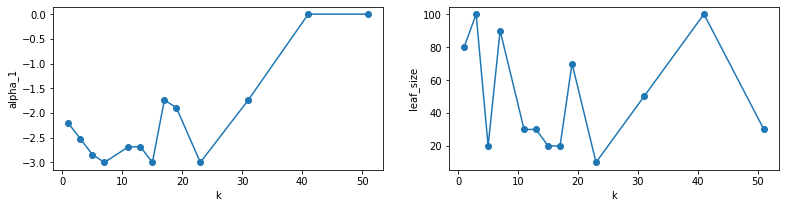

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

k = [1,3,5,7,11,13,15,17,19,23,31,41,51]
alpha = [0.006158482110660267, 0.002976351441631319, 0.0014384498882876629, 0.001, 0.00206913808111479,
         0.00206913808111479, 0.001, 0.018329807108324356, 0.012742749857031334, 0.001, 0.018329807108324356,1.0,1.0]

leafs = [80,100,20,90,30,30,20,20,70,10,50,100,30]

print(np.logspace(-3,0,20))

plt.figure(figsize= (13,3))
plt.subplot(1,2,1)
plt.plot(k,np.log10(alpha), '-o')
plt.xlabel('k')
plt.ylabel('alpha_1')

plt.subplot(1,2,2)
plt.plot(k,leafs, '-o')
plt.xlabel('k')
plt.ylabel('leaf_size')

### Possible inversion of importances with 41 and 51 enlarge the grid over 1

Once the code has been runned, it shows that the inversion of importances is minimal.

In [3]:
k_try = [41,51]

c = [0,0]
ham = [1, 1.1, 1.5, 2, 10, 100]
for i in k_try:
    best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [i])
    print('\n \n Con K = {}, a_ham = {}, best_leaf = {} \n \n'.format(i,best_alpha, best_leaf))

Tue Sep  8 11:14:47 2020
START...
Computing Euclidean ...
Adding Hamming 1 (Categorical)... alpha = 1
Start CV...
New best params found! alpha:1, k:41, leaf:10,
                                                        acc:  0.7738245214845365, st.error:  0.0026665378743379246,
                                                        rmse: 0.4755460182179337, st.error:  0.0028045976775733605
New best params found! alpha:1, k:41, leaf:20,
                                                        acc:  0.776159028206292, st.error:  0.004250295389391552,
                                                        rmse: 0.4730334519149495, st.error:  0.004481215324417234
Adding Hamming 1 (Categorical)... alpha = 1.1
Start CV...
Adding Hamming 1 (Categorical)... alpha = 1.5
Start CV...
Adding Hamming 1 (Categorical)... alpha = 2
Start CV...
Adding Hamming 1 (Categorical)... alpha = 10
Start CV...
Adding Hamming 1 (Categorical)... alpha = 100
Start CV...
Tue Sep  8 11:44:57 2020

 
 Con K = 41, a_ham

### Now I have to evaluate the performance for each optimized alpha/k

In [2]:
def row_tab(X_try, categorical, non_categorical, len_X_train, a_ham, k, leaf_size):
    print(ctime())
    dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham)
    print(ctime())
    X_train_new = dist_matr[:len_X_train,:len_X_train]
    X_test_new = dist_matr[len_X_train:,:len_X_train]

    del dist_matr

    neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = k, leaf_size = leaf_size)
    neigh123.fit(X_train_new, y_train.ravel())
    y_pred = neigh123.predict(X_test_new)
    y_pred_train = neigh123.predict(X_train_new)

    del X_train_new, X_test_new
    
    acc_train = accuracy_score(y_train, y_pred_train)        
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    auc_train = roc_auc_score(y_train, y_pred_train)
    rec_train = recall_score(y_train, y_pred_train)
    prec_train = precision_score(y_train, y_pred_train)

    acc_test = accuracy_score(y_pred, y_test)
    rmse_test = sqrt(mean_squared_error(y_pred, y_test))
    auc_test = roc_auc_score(y_pred, y_test)
    rec_test = recall_score(y_pred, y_test)
    prec_test = precision_score(y_pred, y_test)

    return pd.DataFrame(np.array([[acc_train, acc_test, rmse_train, rmse_test, auc_train, auc_test,
                                   rec_train, rec_test, prec_train, prec_test]]))

In [5]:
ks = [1,3,5,7,11,13,15,17,19,23,31,41,51]
alphas = [0.006158482110660267, 0.002976351441631319, 0.0014384498882876629, 0.001, 0.00206913808111479,
         0.00206913808111479, 0.001, 0.018329807108324356, 0.012742749857031334, 0.001, 0.018329807108324356,1.0,1.0]

leafs = [80,100,20,90,30,30,20,20,70,10,50,100,30]

a = pd.DataFrame()

for i in range(0,13):
    print(i, end = ' ')
    
    rt = row_tab(X_try, categorical, non_categorical, len_X_train, alphas[i], ks[i], leafs[i])
    a = pd.concat([a, rt], axis = 0)
    

0 Sun Sep  6 19:58:07 2020
Sun Sep  6 20:16:21 2020
1 Sun Sep  6 20:20:15 2020
Sun Sep  6 20:54:17 2020
2 Sun Sep  6 20:56:37 2020
Sun Sep  6 21:34:28 2020
3 Sun Sep  6 21:36:48 2020
Sun Sep  6 22:02:33 2020
4 Sun Sep  6 22:06:14 2020
Sun Sep  6 22:33:25 2020
5 Sun Sep  6 22:37:38 2020
Sun Sep  6 23:13:43 2020
6 Sun Sep  6 23:16:49 2020
Sun Sep  6 23:48:24 2020
7 Sun Sep  6 23:51:12 2020
Mon Sep  7 00:09:21 2020
8 Mon Sep  7 00:11:24 2020
Mon Sep  7 00:40:14 2020
9 Mon Sep  7 00:43:41 2020
Mon Sep  7 01:18:02 2020
10 Mon Sep  7 01:20:35 2020
Mon Sep  7 01:59:33 2020
11 Mon Sep  7 02:02:37 2020
Mon Sep  7 02:26:31 2020
12 Mon Sep  7 02:30:33 2020
Mon Sep  7 02:58:04 2020


In [7]:
a.columns = ['acc_train','acc_test','rmse_train','rmse_test','auc_train','auc_test',
             'recall_train','recall_test','precision_train','precision_test']
a

,acc_train,acc_test,rmse_train,rmse_test,auc_train,auc_test,recall_train,recall_test,precision_train,precision_test
0,0.999055,0.856208,0.030744,0.379200,0.998933,0.845032,0.999458,0.888729,0.999007,0.883015
0,0.920105,0.854289,0.282658,0.381721,0.913869,0.843935,0.940778,0.881780,0.930280,0.888552
0,0.895474,0.850226,0.323304,0.387007,0.887419,0.839927,0.922181,0.876720,0.909374,0.887837
0,0.881074,0.844244,0.344856,0.394660,0.871970,0.833450,0.911258,0.871980,0.897244,0.883193
0,0.857611,0.833973,0.377344,0.407464,0.845869,0.822463,0.896542,0.863125,0.875286,0.876228
0,0.849772,0.830587,0.387593,0.411598,0.837162,0.819053,0.891577,0.859096,0.868067,0.875513
0,0.844546,0.826862,0.394277,0.416098,0.831503,0.814721,0.887786,0.857646,0.863616,0.870513
0,0.837985,0.825395,0.402511,0.417858,0.825496,0.812965,0.879390,0.857445,0.860588,0.868012
0,0.834705,0.820993,0.406565,0.423092,0.822016,0.808009,0.876772,0.855196,0.857951,0.862833
0,0.825364,0.815350,0.417895,0.429709,0.811328,0.802059,0.871897,0.849656,0.848682,0.859975


In [9]:
a.to_csv('output/tab_knn_previous_binary.csv')

Text(0.5, 1.0, 'Precision')

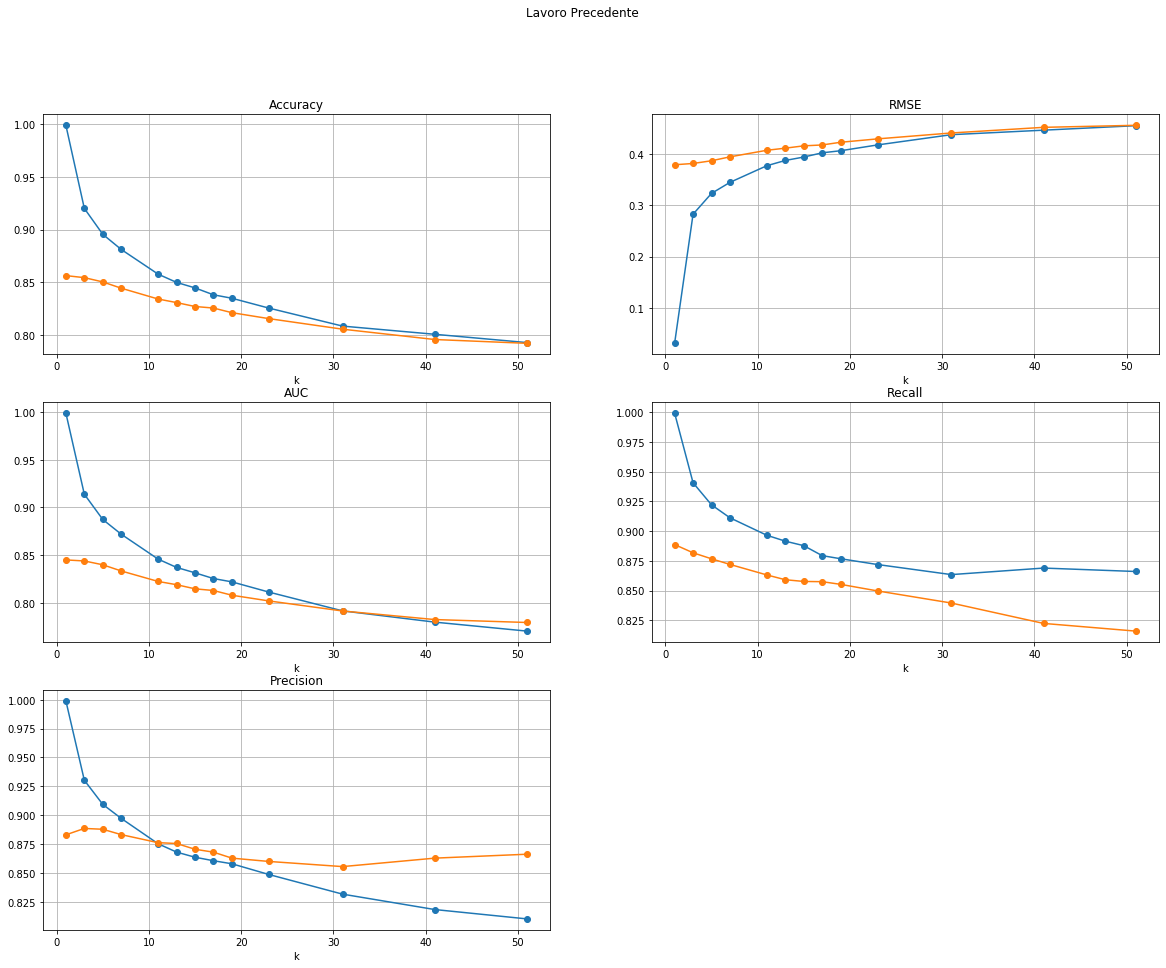

In [13]:
from helper_knn import *
k = [1,3,5,7,11,13,15,17,19,23,31,41,51]
table = pd.read_csv('output/tab_knn_previous_binary.csv').drop(columns = 'Unnamed: 0')

plt.figure(figsize = [20,15])
plt.subplot(3,2,1)
plt.suptitle('Lavoro Precedente')

plt.plot(k, table.acc_train, '-o')
plt.plot(k, table.acc_test, '-o')
plt.grid()
plt.xlabel('k')
plt.title('Accuracy')

plt.subplot(3,2,2)
plt.plot(k,table.rmse_train, '-o')
plt.plot(k,table.rmse_test, '-o')
plt.grid()
plt.xlabel('k')
plt.title('RMSE')

plt.subplot(3,2,3)
plt.plot(k, table.auc_train, '-o')
plt.plot(k, table.auc_test, '-o')
plt.grid()
plt.xlabel('k')
plt.title('AUC')

plt.subplot(3,2,4)
plt.plot(k, table.recall_train, '-o')
plt.plot(k, table.recall_test, '-o')
plt.grid()
plt.xlabel('k')
plt.title('Recall')

plt.subplot(3,2,5)
plt.plot(k, table.precision_train, '-o')
plt.plot(k, table.precision_test, '-o')
plt.grid()
plt.xlabel('k')
plt.title('Precision')

## Previous work (multiclass)

In [1]:
from helper_knn import *

X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'multiclass', seed = 42)

categorical = ['conc1_type', 'exposure_type', 'control_type', 'media_type', 'application_freq_unit',
                    'class', 'tax_order', 'family', 'genus', 'species']

non_categorical = ['obs_duration_mean', 'atom_number', 'alone_atom_number', 'bonds_number', 'doubleBond',
                   'tripleBond', 'ring_number', 'Mol', 'MorganDensity', 'LogP', 'oh_count']

In [2]:
def row_tab(X_try, categorical, non_categorical, len_X_train, a_ham, k, leaf_size):
    
    dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham)
    
    X_train_new = dist_matr[:len_X_train,:len_X_train]
    X_test_new = dist_matr[len_X_train:,:len_X_train]

    del dist_matr

    neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = k, leaf_size = leaf_size)
    neigh123.fit(X_train_new, y_train.ravel())
    y_pred = neigh123.predict(X_test_new)
    y_pred_train = neigh123.predict(X_train_new)


    acc_train = accuracy_score(y_train, y_pred_train)        
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    
    acc_test = accuracy_score(y_pred, y_test)
    rmse_test = sqrt(mean_squared_error(y_pred, y_test))
    print(a_ham, "\t", k)
    
    return pd.DataFrame(np.array([[acc_train, acc_test, rmse_train, rmse_test]]))

In [1]:
k_try = [1,5,9,13,17,21,31,41,51]

c = [0,0]
ham = np.append(np.logspace(-3, 0, 12), [1.1,2,10])
for i in k_try:
    best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [i])
    print('\n \n Con K = {}, a_ham = {}, best_leaf = {} \n \n'.format(i,best_alpha, best_leaf))

Tue Sep  8 12:34:38 2020
START...
Computing Euclidean ...
Adding Hamming 1 (Categorical)... alpha = 0.001
Start CV...
New best params found! alpha:0.001, k:1, leaf:10,
                                                        acc:  0.6010788435733997, st.error:  0.004131055765790905,
                                                        rmse: 0.9127464995976299, st.error:  0.010999460521725506
New best params found! alpha:0.001, k:1, leaf:40,
                                                        acc:  0.6023573161687608, st.error:  0.0018365605933496668,
                                                        rmse: 0.9075030940174289, st.error:  0.0068973647612101075
New best params found! alpha:0.001, k:1, leaf:50,
                                                        acc:  0.6047492328469017, st.error:  0.0053591139022992115,
                                                        rmse: 0.9063068551039878, st.error:  0.009454595578337017
New best params found! alpha:0.001, k:1, l

Start CV...
Adding Hamming 1 (Categorical)... alpha = 0.02310129700083159
Start CV...
New best params found! alpha:0.02310129700083159, k:9, leaf:20,
                                                        acc:  0.5537084591059531, st.error:  0.0015823724966046225,
                                                        rmse: 1.0202475858869822, st.error:  0.005578282634933487
Adding Hamming 1 (Categorical)... alpha = 0.04328761281083057
Start CV...
New best params found! alpha:0.04328761281083057, k:9, leaf:10,
                                                        acc:  0.554541853867167, st.error:  0.004205685403105925,
                                                        rmse: 1.0173049446357112, st.error:  0.009275417885181644
New best params found! alpha:0.04328761281083057, k:9, leaf:50,
                                                        acc:  0.5549322879312527, st.error:  0.004614426717946925,
                                                        rmse: 1.01848969235

Start CV...
Adding Hamming 1 (Categorical)... alpha = 10.0
Start CV...
Tue Sep  8 17:37:37 2020

 
 Con K = 13, a_ham = 0.2848035868435799, best_leaf = 100 
 

Tue Sep  8 17:37:38 2020
START...
Computing Euclidean ...
Adding Hamming 1 (Categorical)... alpha = 0.001
Start CV...
New best params found! alpha:0.001, k:17, leaf:10,
                                                        acc:  0.5255202477884804, st.error:  0.002480170607641786,
                                                        rmse: 1.0843721839035654, st.error:  0.003596390344653999
New best params found! alpha:0.001, k:17, leaf:60,
                                                        acc:  0.5278552490239921, st.error:  0.0014060200675707144,
                                                        rmse: 1.0853847486757693, st.error:  0.007826902673742695
Adding Hamming 1 (Categorical)... alpha = 0.001873817422860383
Start CV...
New best params found! alpha:0.001873817422860383, k:17, leaf:100,
                   

Start CV...
Tue Sep  8 20:14:46 2020

 
 Con K = 21, a_ham = 0.2848035868435799, best_leaf = 10 
 

Tue Sep  8 20:14:48 2020
START...
Computing Euclidean ...
Adding Hamming 1 (Categorical)... alpha = 0.001
Start CV...
New best params found! alpha:0.001, k:31, leaf:10,
                                                        acc:  0.49277217148562596, st.error:  0.0016610745314819418,
                                                        rmse: 1.1445324421130596, st.error:  0.005434415243343445
New best params found! alpha:0.001, k:31, leaf:30,
                                                        acc:  0.49505155537711854, st.error:  0.001413266709385652,
                                                        rmse: 1.1418092827172204, st.error:  0.014979333599971589
New best params found! alpha:0.001, k:31, leaf:60,
                                                        acc:  0.49588564554830217, st.error:  0.0017950658139069165,
                                                   

Adding Hamming 1 (Categorical)... alpha = 0.012328467394420659
Start CV...
Adding Hamming 1 (Categorical)... alpha = 0.02310129700083159
Start CV...
New best params found! alpha:0.02310129700083159, k:41, leaf:50,
                                                        acc:  0.48598833905655736, st.error:  0.004451289664549363,
                                                        rmse: 1.1658455097885394, st.error:  0.007038226349684437
New best params found! alpha:0.02310129700083159, k:41, leaf:100,
                                                        acc:  0.48782412865517133, st.error:  0.0035522260102301127,
                                                        rmse: 1.160983757313217, st.error:  0.003714426380267089
Adding Hamming 1 (Categorical)... alpha = 0.04328761281083057
Start CV...
New best params found! alpha:0.04328761281083057, k:41, leaf:50,
                                                        acc:  0.48799145974743013, st.error:  0.006308445883468851,
     

New best params found! alpha:0.08111308307896868, k:51, leaf:10,
                                                        acc:  0.47892830524108865, st.error:  0.003226570123883787,
                                                        rmse: 1.1720341879894742, st.error:  0.006714428638059432
New best params found! alpha:0.08111308307896868, k:51, leaf:30,
                                                        acc:  0.47948356692154215, st.error:  0.00443881783392058,
                                                        rmse: 1.1693253195176816, st.error:  0.0043887656849087376
New best params found! alpha:0.08111308307896868, k:51, leaf:50,
                                                        acc:  0.4823198351167509, st.error:  0.002833427208523352,
                                                        rmse: 1.1640739075183009, st.error:  0.004928417572065761
Adding Hamming 1 (Categorical)... alpha = 0.1519911082952933
Start CV...
New best params found! alpha:0.151991108295

Con K = 1, a_ham = 0.001873817422860383, best_leaf = 60

Con K = 5, a_ham = 0.1519911082952933,, best_leaf = 50

Con K = 9, a_ham = 0.1519911082952933, best_leaf = 70 

Con K = 13, a_ham = 0.2848035868435799, best_leaf = 100 

Con K = 17, a_ham = 0.2848035868435799, best_leaf = 10 

Con K = 21, a_ham = 0.2848035868435799, best_leaf = 10 

Con K = 31, a_ham = 0.2848035868435799, best_leaf = 40 

Con K = 41, a_ham = 0.2848035868435799, best_leaf = 90

Con K = 51, a_ham = 0.2848035868435799, best_leaf = 40

[1.00000000e-03 1.87381742e-03 3.51119173e-03 6.57933225e-03
 1.23284674e-02 2.31012970e-02 4.32876128e-02 8.11130831e-02
 1.51991108e-01 2.84803587e-01 5.33669923e-01 1.00000000e+00
 1.10000000e+00 2.00000000e+00 1.00000000e+01]


Text(0, 0.5, 'leaf_size')

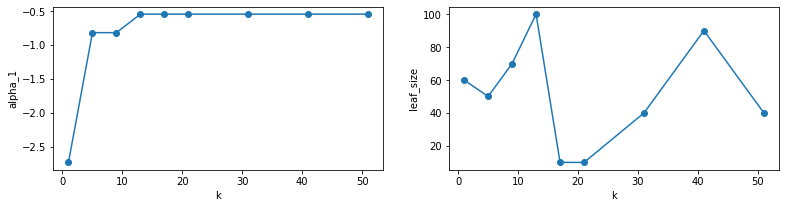

In [4]:
import matplotlib.pyplot as plt
ks = [1,5,9,13,17,21,31,41,51]

alphas = [0.001873817422860383, 0.1519911082952933, 0.1519911082952933, 0.2848035868435799, 0.2848035868435799,
         0.2848035868435799, 0.2848035868435799, 0.2848035868435799, 0.2848035868435799]

leafs = [60,50,70,100,10,10,40,90,40]

ham = np.append(np.logspace(-3, 0, 12), [1.1,2,10])
print(ham)

plt.figure(figsize= (13,3))
plt.subplot(1,2,1)
plt.plot(ks,np.log10(alphas), '-o')
plt.xlabel('k')
plt.ylabel('alpha_1')

plt.subplot(1,2,2)
plt.plot(ks,leafs, '-o')
plt.xlabel('k')
plt.ylabel('leaf_size')

In [5]:
a = pd.DataFrame()
for i in range(0,10):
    print(i, end = ' ')
    rt = row_tab(X_try, categorical, non_categorical, len_X_train, alphas[i], ks[i], leafs[i])
    
    a = pd.concat([a, rt], axis = 0)
    


0 0.001873817422860383 	 1
1 0.1519911082952933 	 5
2 0.1519911082952933 	 9
3 0.2848035868435799 	 13
4 0.2848035868435799 	 17
5 0.2848035868435799 	 21
6 0.2848035868435799 	 31
7 0.2848035868435799 	 41
8 0.2848035868435799 	 51
9 

IndexError: list index out of range

In [7]:
a.index = ['k = ' + str(i) for i in ks]
a.columns = ['acc_train','acc_test','rmse_train','rmse_test']
a

,acc_train,acc_test,rmse_train,rmse_test
k = 1,0.997331,0.618284,0.062385,0.891140
k = 5,0.730346,0.595147,0.773246,0.925986
k = 9,0.671355,0.570767,0.860890,0.961681
k = 13,0.634049,0.557223,0.928352,0.993546
k = 17,0.612643,0.552822,0.953144,1.000056
k = 21,0.594518,0.538826,0.983207,1.026676
k = 31,0.564773,0.523815,1.038431,1.062282
k = 41,0.544090,0.512980,1.070956,1.084729
k = 51,0.529801,0.501016,1.099442,1.116670


In [8]:
a.to_csv('output/tab_knn_previous_multiclass.csv')

Text(0.5, 1.0, 'RMSE')

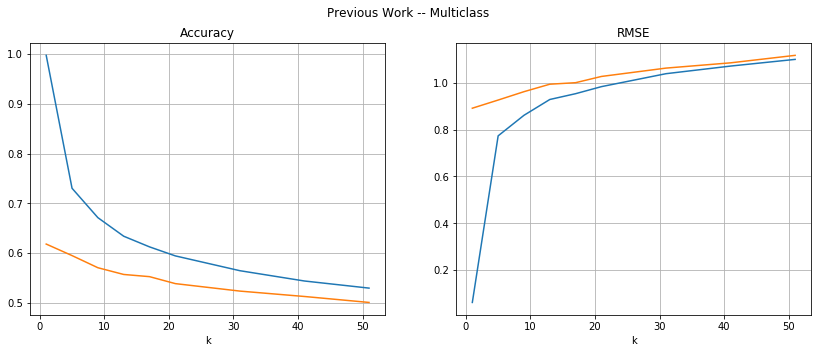

In [11]:
k = ks
table = a

plt.figure(figsize = [14,5])
plt.subplot(1,2,1)
plt.suptitle('Previous Work -- Multiclass')

plt.plot(k, table.acc_train)
plt.plot(k, table.acc_test)
plt.grid()
plt.xlabel('k')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(k,table.rmse_train)
plt.plot(k,table.rmse_test)
plt.grid()
plt.xlabel('k')
plt.title('RMSE')